In [1]:
# Etape d'importation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Etape de chargement
df = pd.read_csv('../data/df_features.csv')
df.head()

,Unnamed: 0,etiquette,montant_operation,montant_banque,presence_num_ref,similarite_cos,num_ref_in,delai_jours,delai_absolu,dans_fenetre_valide,montant_ratio,ecart_montant,montant_exact_match,type_operation_depense,type_operation_facture,categorie_abonnements,categorie_assurances,categorie_aucune,categorie_conseil,categorie_divertissement,categorie_dplacements,categorie_formations,categorie_fournitures_bureau,categorie_frais_bancaires,categorie_juridique_conformit,categorie_licences_logicielles,categorie_maintenance,categorie_marketing,categorie_outils_rh,categorie_quipement,categorie_services_cloud,categorie_services_publiques
0,0,1,448.85,988.89,True,0.354687,True,5,5,True,0.453893,540.04,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,186.47,685.81,True,0.370854,True,65,65,False,0.271897,499.34,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,518.18,518.18,True,0.300678,True,1,1,True,1.000000,0.00,True,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,534.96,534.96,True,0.445040,True,0,0,True,1.000000,0.00,True,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,524.38,524.38,True,0.276354,True,2,2,True,1.000000,0.00,True,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Etape de préparation
target_col = 'etiquette'  # adapte au nom de ta colonne cible
X = df.drop(columns=[target_col], errors='ignore')
y = df[target_col]

In [6]:
#Etape Split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [7]:
#Etape de normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Etpe d'entrainement KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
#Etape d'évaluation
y_pred = knn.predict(X_test_scaled)
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test , y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.9797979797979798
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2451
           1       0.97      0.99      0.98      2895

    accuracy                           0.98      5346
   macro avg       0.98      0.98      0.98      5346
weighted avg       0.98      0.98      0.98      5346

confusion_matrix:
 [[2371   80]
 [  28 2867]]


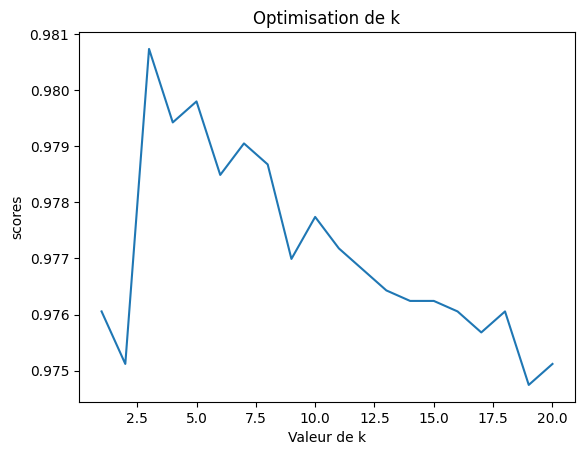

In [11]:
#Etape d'optimisation de K
scores = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled , y_train)
    scores.append(model.score(X_test_scaled , y_test))

plt.plot(range(1,21) , scores)
plt.xlabel("Valeur de k")
plt.ylabel("scores")
plt.title("Optimisation de k")
plt.show()